# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -2 = Unused;-1 = pay duly; 0 = Revolving Credits; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

**The Dataset and its attributes are described below**

1. ID: ID of each client
2. LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
3. SEX: Gender (1=male, 2=female)
4. EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
5. MARRIAGE: Marital status (1=married, 2=single, 3=others)
6. AGE: Age in years
7. PAY_0: Repayment status in September, 2005 (-2 = Unused,-1=pay duly,0=Revolving Credit, 1=payment delay for one month, 2=payment delay for two months,8=payment delay for eight months, 9=payment delay for nine months and above)
8. PAY_2: Repayment status in August, 2005 (scale same as above)
9. PAY_3: Repayment status in July, 2005 (scale same as above)
10. PAY_4: Repayment status in June, 2005 (scale same as above)
11. PAY_5: Repayment status in May, 2005 (scale same as above)
12. PAY_6: Repayment status in April, 2005 (scale same as above)
13. BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
14. BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
15. BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
16. BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
17. BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
18. BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
19. PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
20. PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
21. PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
22. PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
23. PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
24. PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
25. default.payment.next.month: Default payment (1=yes, 0=no)

Before moving forward let's understand what actually meant by the **Credit Card Default.**
*   A payment default occurs when you fail to pay the Minimum Amount Due on the credit card for a few consecutive months.
*   Usually, the default notice is sent by the card issuer after 6 consecutive missed payments.



# **Performance Metrics**
* **Precision** is a good metric to use when the costs of **false positive(FP)** is high.

  **Precision = TP / (TP + FP)**

* **Recall** is a good metric to use when the cost associated with **false negative(FN)** is high.

  **Recall = TP / (TP + FN)**

* **F1-score** is a weighted average of **precision** and **recall**. Thus, it considers **FP** and **FN.** This metric is very useful when we have uneven class distribution, as it seeks a balance between **precision** and **recall.**

  **F1-score = 2 * (precision * recall) / (precision + recall)**

# **Note**
* In this classification problem there is a high cost for the bank when a default credit card is predicted as non-default, since no actions can be taken. Thus, we will give **recall** more importance .

# **Import important libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#**Mount Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**Loading Dataset**

In [ ]:
data= pd.read_excel("/content/drive/MyDrive/Alma Better/AlmaBetter CapstoneProject/Credit Card Default Prediction/default of credit card clients.xlsx")

#**Data Overview**

In [ ]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
data.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,0,0,47929,48905,49764,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

Check number of rows and columns in our dataset.

In [ ]:
print("Number of rows is: ", data.shape[0])
print("Number of columns is: ", data.shape[1])

Number of rows is:  30000
Number of columns is:  25


Let's look at each feture in our dataset.

In [ ]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

Check if we have any null values.

In [ ]:
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

There is no NAN/NULL values in our dataset.

##**Column Rename**

Lets rename some columns for better convinience

In [ ]:
data = data.rename(columns={'default payment next month': 'def_pay', 'PAY_0': 'PAY_1'})
data.rename(columns={'PAY_1':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
data.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
data.rename(columns={'PAY_AMT6':'PAY_AMT_MAR','PAY_AMT1':'PAY_AMT_AUG','PAY_AMT2':'PAY_AMT_JUL','PAY_AMT3':'PAY_AMT_JUN','PAY_AMT4':'PAY_AMT_MAY','PAY_AMT5':'PAY_AMT_APR'},inplace=True)

#**Feature Creation**

Lets create a variable which hold the cummulative values for Pay for all months.
Since -2 = no consumption we will convert it to 0

In [ ]:
data = data.replace([-2],0)
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,PAY_AMT_MAR,def_pay
0,1,20000,2,2,1,24,2,2,-1,-1,0,0,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
data["pay"]=data["PAY_SEPT"]+data["PAY_AUG"]+data["PAY_JUL"]+data["PAY_JUN"]+data["PAY_MAY"]+data["PAY_APR"]
data["pay"].describe()

count    30000.000000
mean         0.533033
std          4.408759
min         -6.000000
25%         -1.000000
50%          0.000000
75%          1.000000
max         36.000000
Name: pay, dtype: float64

In [ ]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,PAY_AMT_MAR,def_pay,pay
0,1,20000,2,2,1,24,2,2,-1,-1,0,0,3913,3102,689,0,0,0,0,689,0,0,0,0,1,2
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,3
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,-2


Check if any duplicates prresents in our data.

In [ ]:
len(data[data.duplicated()])

0

* We don't have any duplicates in our dataset.

# **Exploratory data Analysis**

##**Univariate Analysis**

**Dependent Variable**

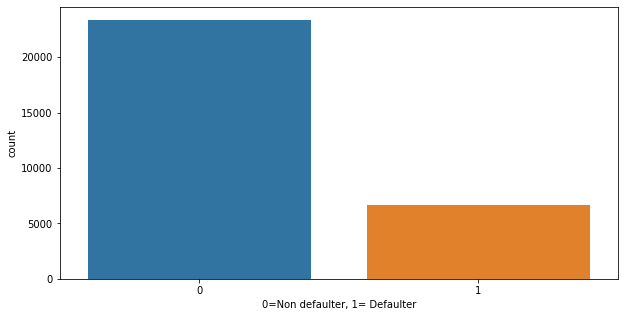

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'def_pay', data = data,)
plt.xlabel("0=Non defaulter, 1= Defaulter")
plt.show()

*   0 - Not Default
*   1 - Default
*   Defaulters are less than the Non Defaulters in the given dataset.



**Independent Variable**

**Sex**

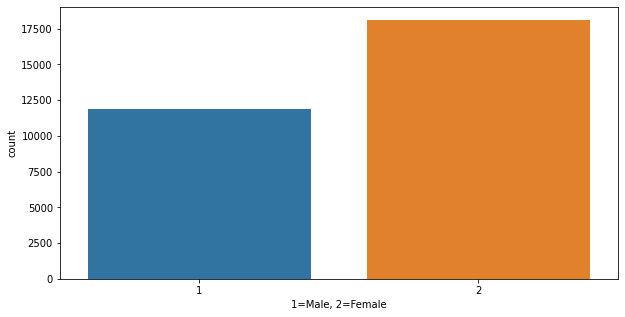

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'SEX', data = data)
plt.xlabel("1=Male, 2=Female")
plt.show()

*   1 - Male
*   2 - Female
*   Number of Male credit holder is less than Female.

**Education**

In [ ]:
data["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

* Lets move the category 5,6,0 to others which is 4

In [ ]:
data["EDUCATION"]= data["EDUCATION"].replace({5:4,6:4,0:4})

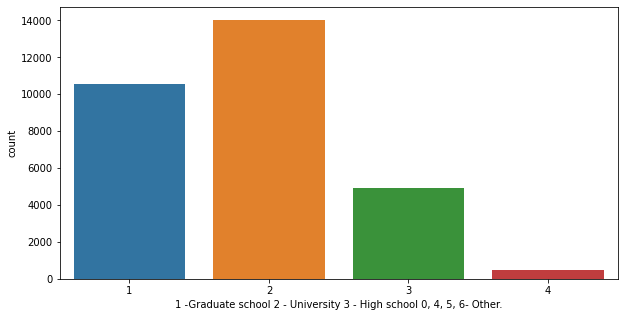

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'EDUCATION', data = data)
plt.xlabel("1 -Graduate school 2 - University 3 - High school 0, 4, 5, 6- Other.")
plt.show()


*   More number of credit holders are university students followed by Graduates and then High school students.

**Marriage**

In [ ]:
data["MARRIAGE"].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

* Lets move the 0 category to 3

In [ ]:
data["MARRIAGE"]= data["MARRIAGE"].replace({0:3})

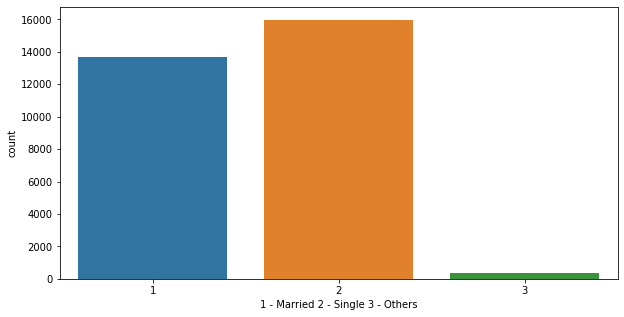

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'MARRIAGE', data = data)
plt.xlabel("1 - Married 2 - Single 3 - Others")
plt.show()

*   1 - married
*   2 - single
*   3 - others
*   More number of credit cards holder are Single.


**Age**

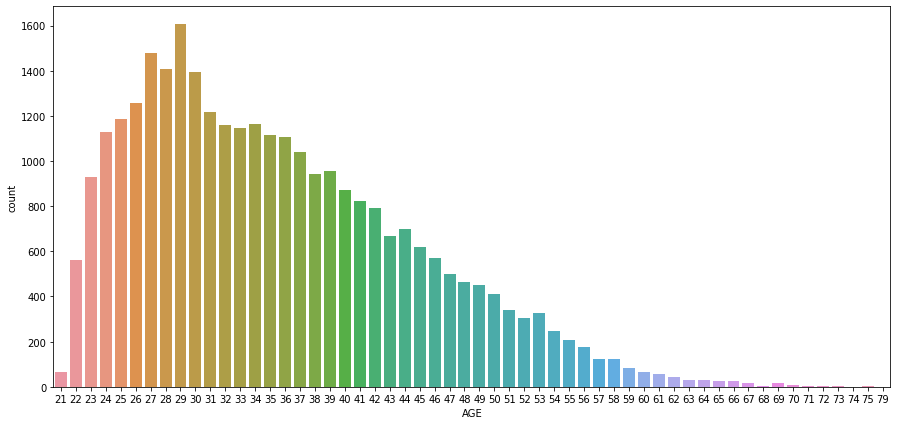

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(x = 'AGE', data = data)
plt.show()

*   We can see more number of credit cards holder age are between 26-30 years old.
*   Age above 60 years old rarely uses the credit card.



Let's look at the payment columns for each month.

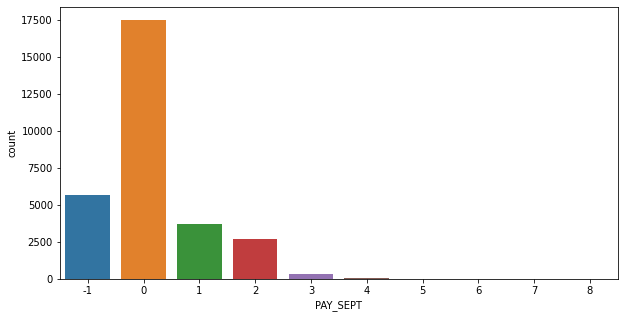

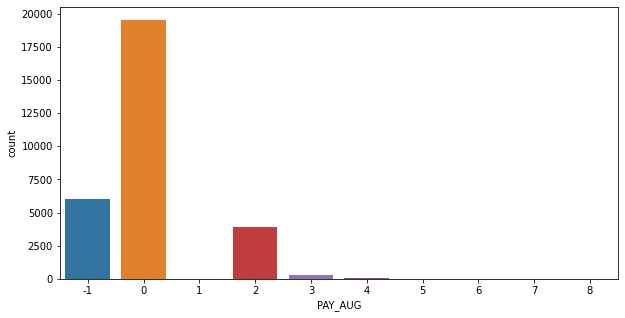

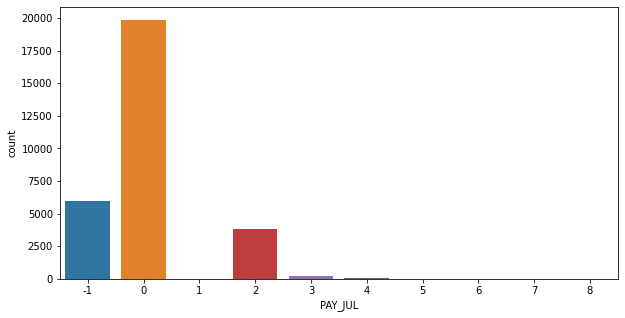

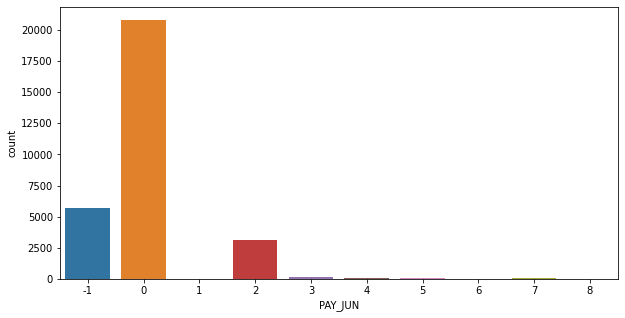

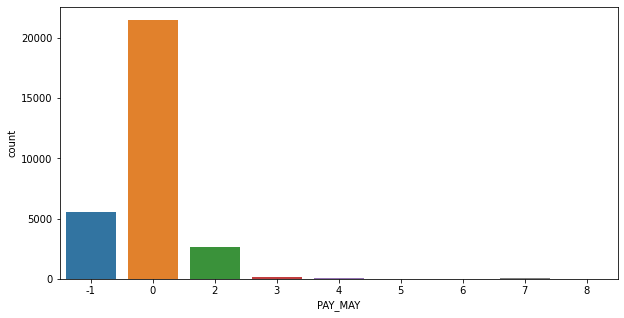

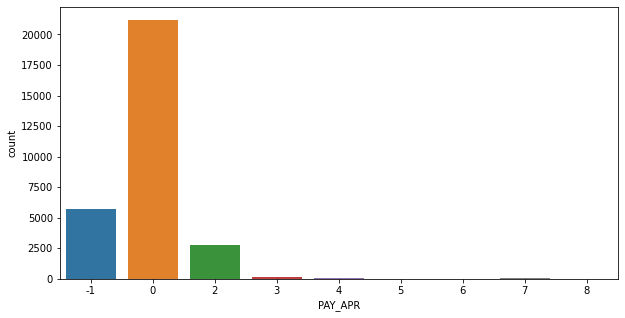

In [ ]:
payment = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR']
for col in payment:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, data = data)

* The above figure shows count plot for each month payment status which shows mostly payments are not due(0) for April to September.

**Limit Balance**

In [ ]:
data['LIMIT_BAL'].value_counts()

50000      3365
20000      1976
30000      1610
80000      1567
200000     1528
           ... 
800000        2
760000        1
690000        1
1000000       1
327680        1
Name: LIMIT_BAL, Length: 81, dtype: int64

Distribution of LIMIT_BAL.

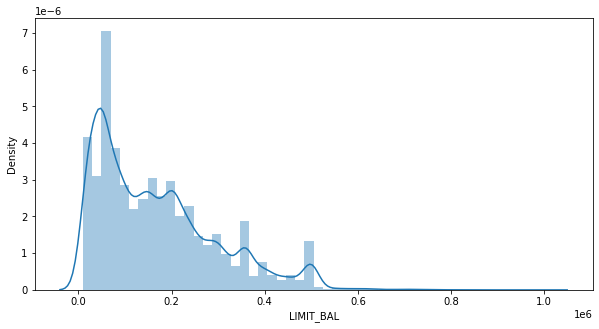

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(data['LIMIT_BAL'], kde=True)
plt.show()

* Maximum amount of given credit in NT dollars is 50,000 followed by 30,000 and 20,000.

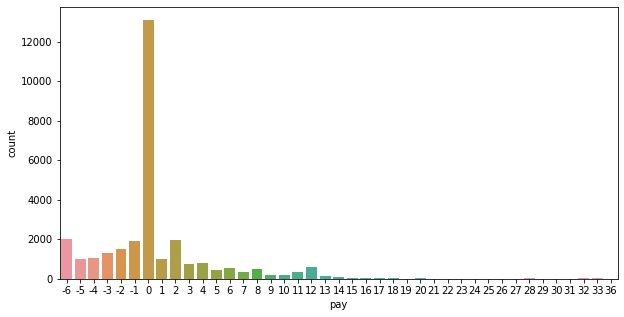

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data['pay'])

plt.show()

##**Bivariate Analysis**

**Sex and Def_Pay**

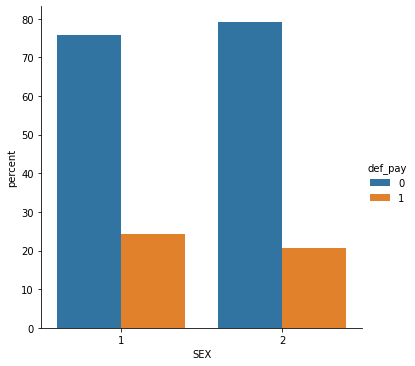

In [ ]:
x,y = 'SEX', 'def_pay'

(data
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

* It is evident from the above graph that the number of defaulter have high proportion of males.

**Education and Def_Pay**

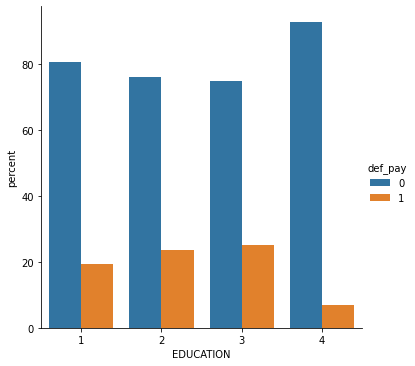

In [ ]:
x,y = 'EDUCATION', 'def_pay'

(data
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

* From the above plot it is clear that those people who are high school students have higher default payment wrt graduates and university people

**Marriage and Def_Pay**

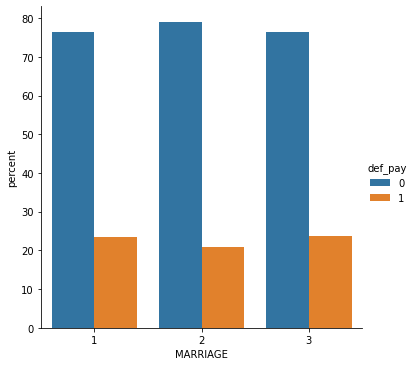

In [ ]:
x,y = 'MARRIAGE', 'def_pay'

(data
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

* High defaulter rate when it comes to others

**Age and Def_Pay**

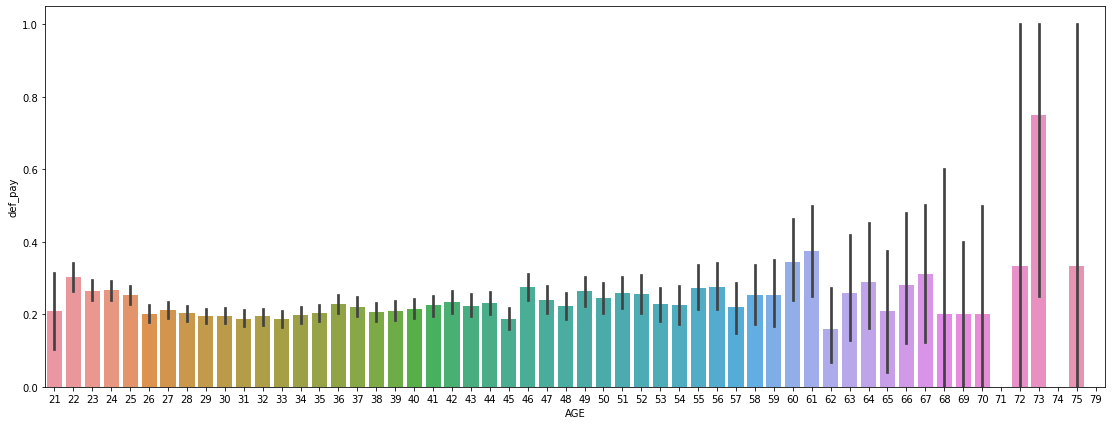

In [ ]:
plt.figure(figsize=(19,7))
sns.barplot(x = 'AGE', y = 'def_pay', data = data)

plt.show()

* Slightly higher defaulter rate in early 20's.




**Check the distribution of amount of bill statement for each month.**

In [ ]:
bill_amnt_df = data[['BILL_AMT_SEPT',	'BILL_AMT_AUG',	'BILL_AMT_JUL',	'BILL_AMT_JUN',	'BILL_AMT_MAY',	'BILL_AMT_APR']]

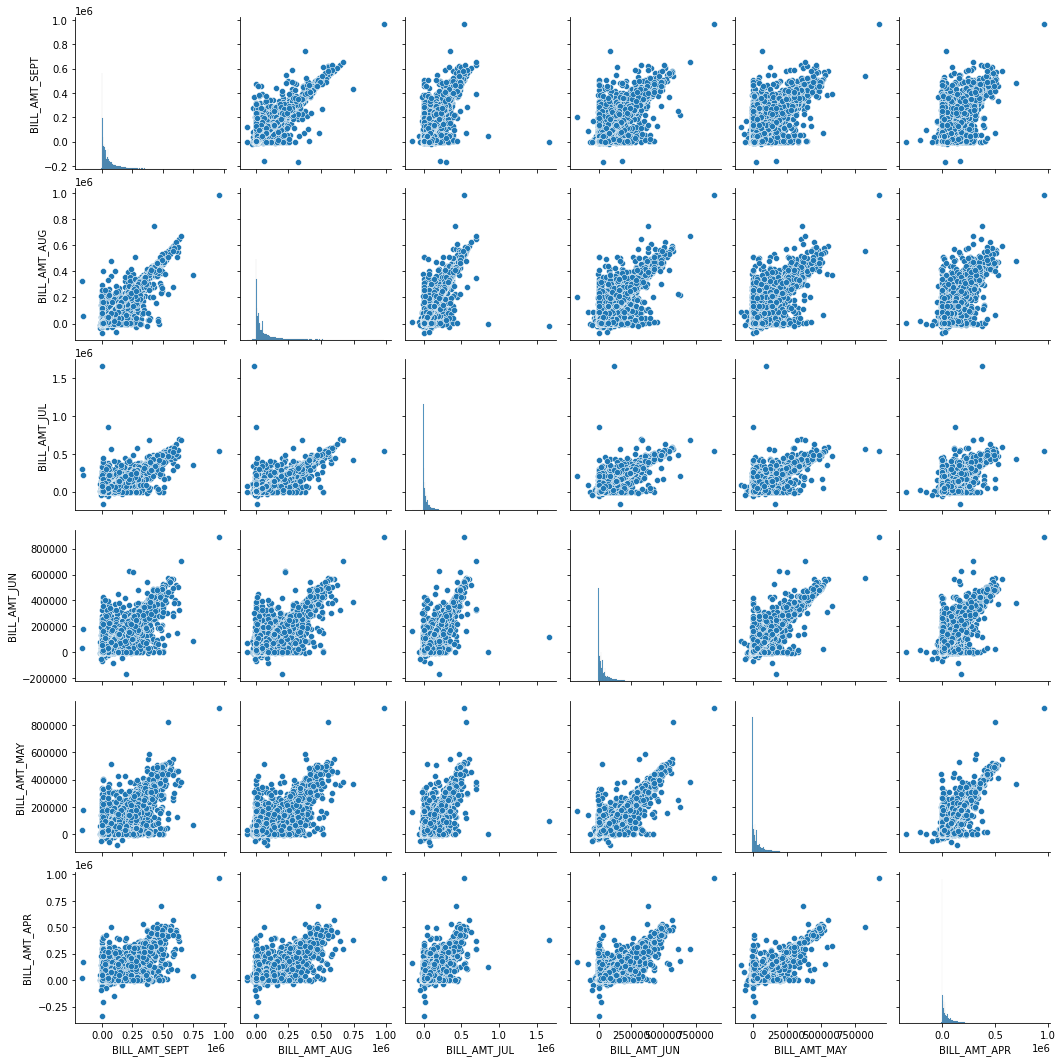

In [ ]:
sns.pairplot(data = bill_amnt_df)

* The above pairplot shows the distribution of bill amount statements for each month explicitly for defaulters and non-defaulters.

**The distribution of amount of previous payment for each month.**

In [ ]:
pay_amnt_df = data[['PAY_AMT_MAR',	'PAY_AMT_AUG',	'PAY_AMT_JUL',	'PAY_AMT_JUN',	'PAY_AMT_MAY',	'PAY_AMT_APR']]

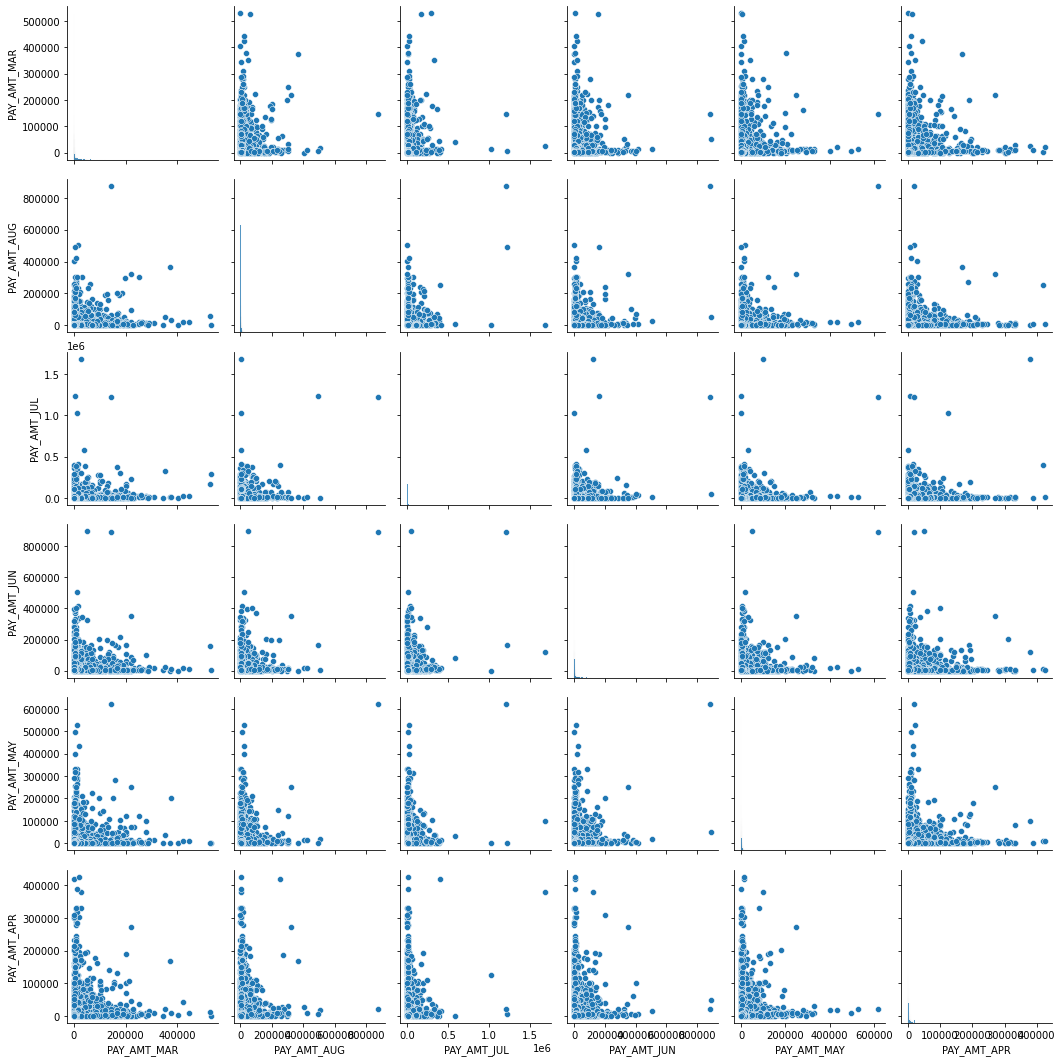

In [ ]:
sns.pairplot(data = pay_amnt_df)

* The above pairplot shows the distribution of payment amount for each month explicitly for defaulters and non-defaulters.

**Columns with similar names to check the correlation.**

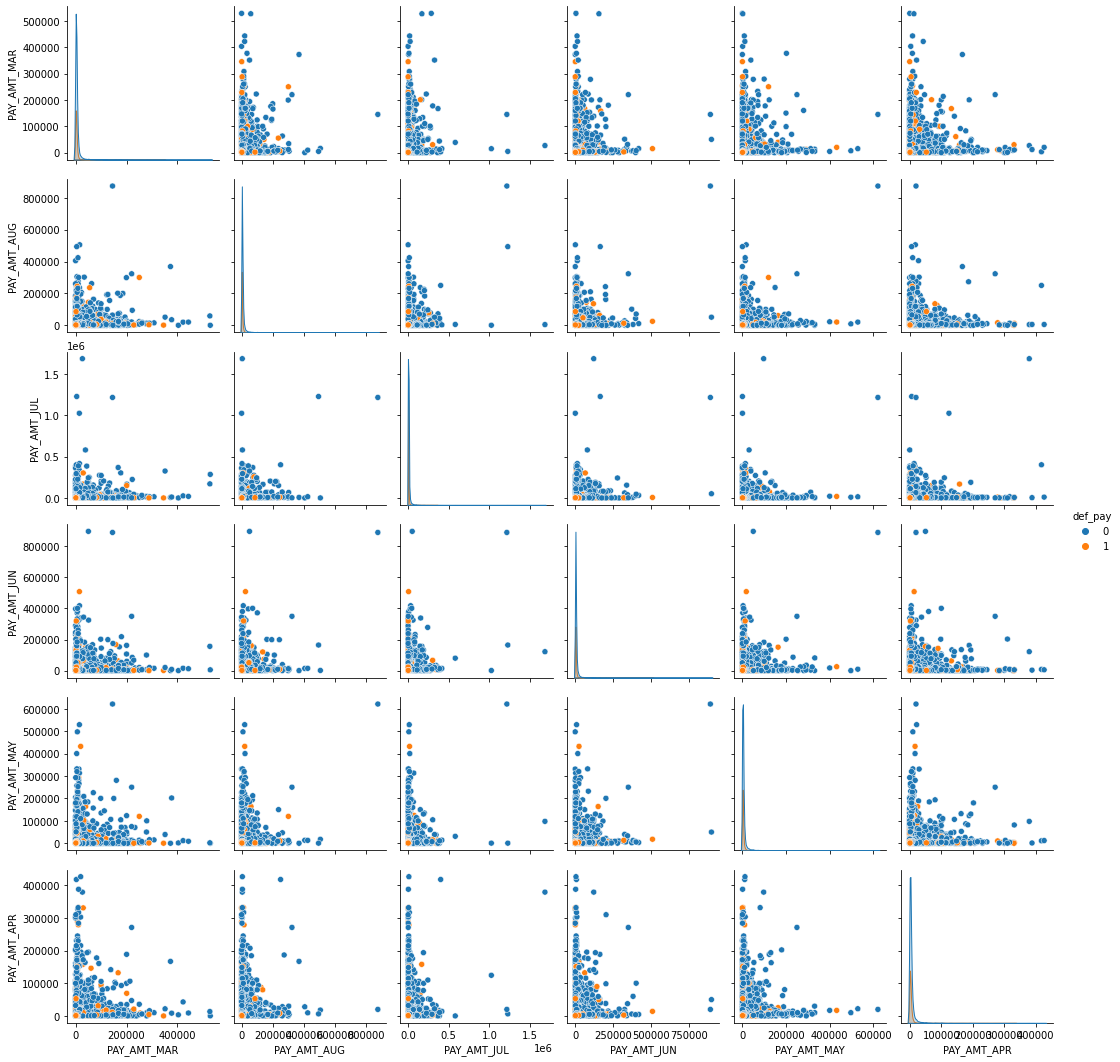

In [ ]:
sns.pairplot(data, vars=pay_amnt_df.columns, kind='scatter',hue= 'def_pay')

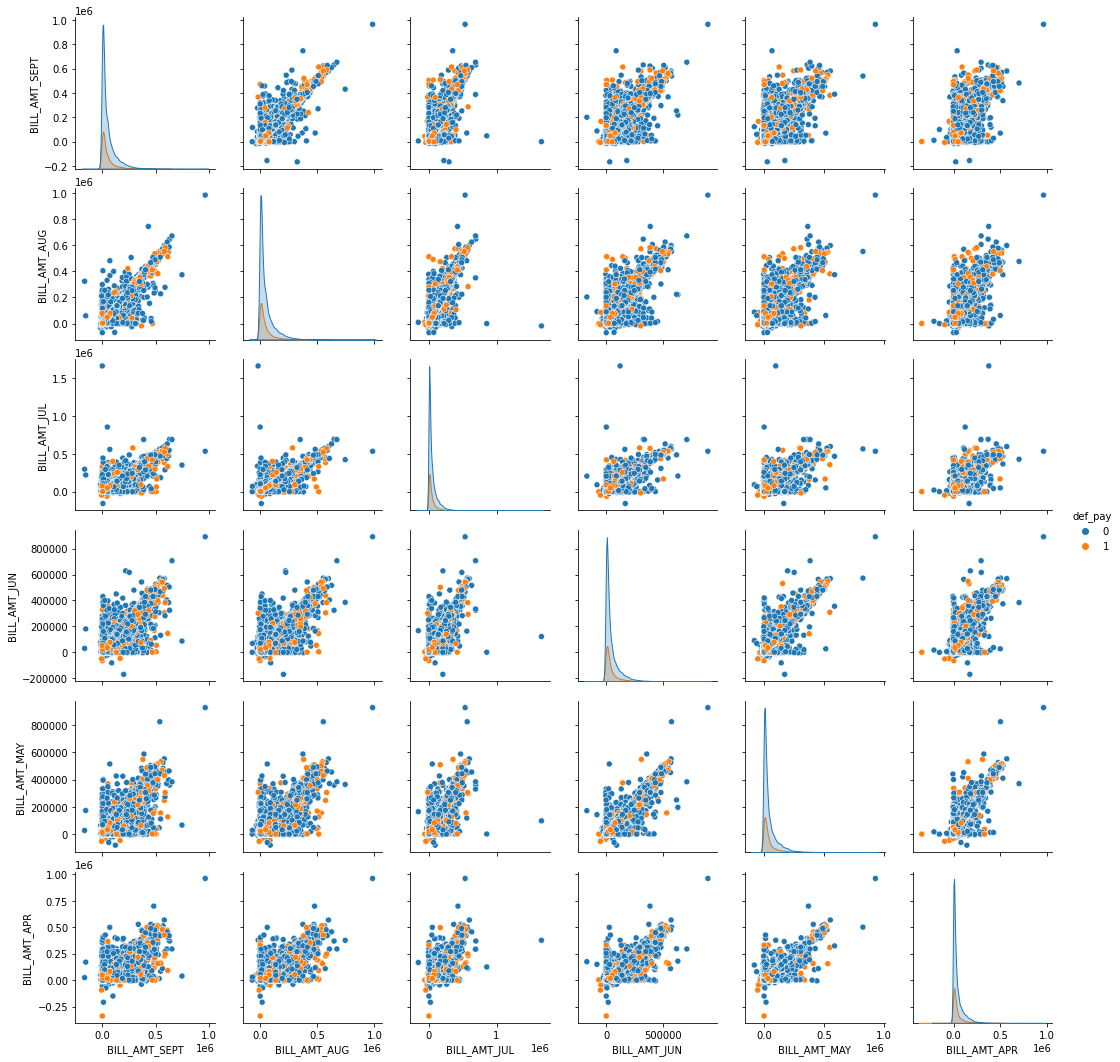

In [ ]:
sns.pairplot(data, vars=bill_amnt_df.columns,hue = 'def_pay')

**Boxplot analysis to check the outliers**

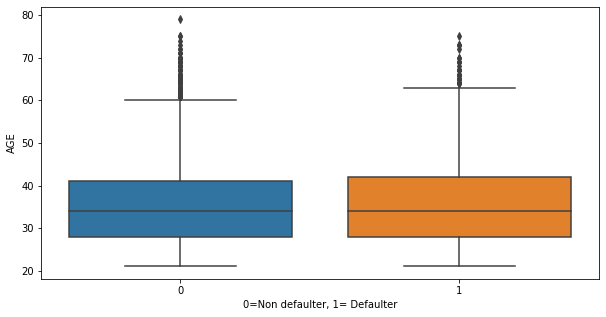

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='def_pay',y='AGE',data=data)
plt.xlabel("0=Non defaulter, 1= Defaulter")
plt.show()

* Not much variation between different ages.

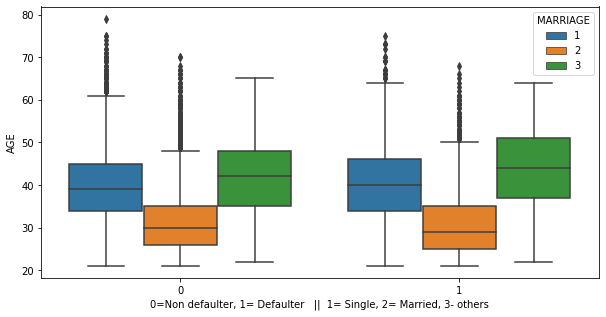

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='def_pay',hue= 'MARRIAGE', y='AGE', data=data)
plt.xlabel("0=Non defaulter, 1= Defaulter   ||  1= Single, 2= Married, 3- others")
plt.show()

The Others category has a slightly higher default rate.

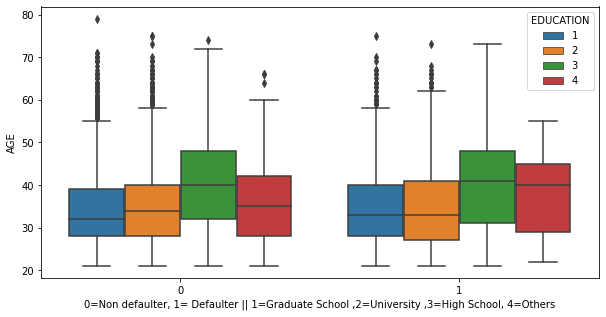

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='def_pay',hue='EDUCATION', y='AGE',data=data)
plt.xlabel("0=Non defaulter, 1= Defaulter || 1=Graduate School ,2=University ,3=High School, 4=Others")
plt.show()


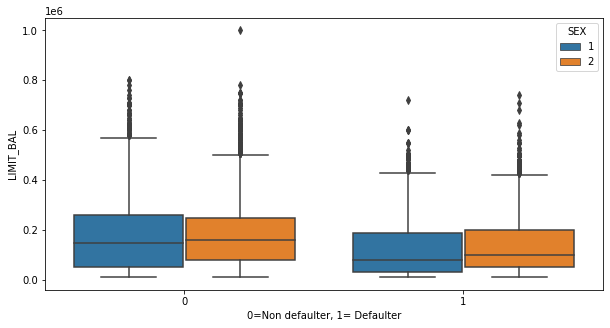

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='def_pay',hue='SEX', y='LIMIT_BAL',data=data)
plt.xlabel("0=Non defaulter, 1= Defaulter")
plt.show()

No visible trend amoung accounts with different Credit Limits.

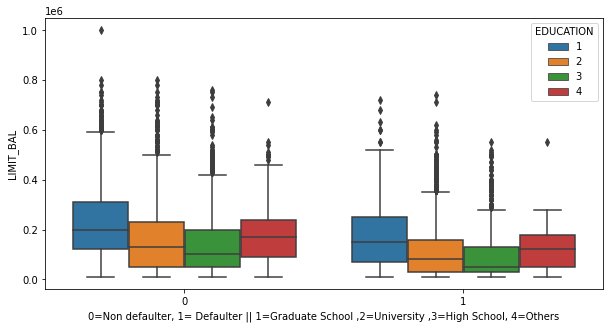

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='def_pay',hue='EDUCATION', y='LIMIT_BAL',data=data)
plt.xlabel("0=Non defaulter, 1= Defaulter || 1=Graduate School ,2=University ,3=High School, 4=Others")
plt.show()

No visible trend related to education and defaulters with Credit limit.

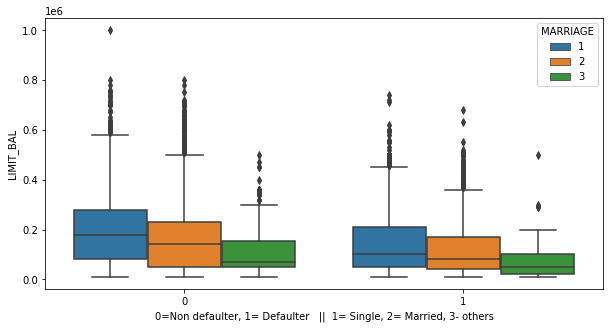

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='def_pay',hue='MARRIAGE', y='LIMIT_BAL',data=data)
plt.xlabel("0=Non defaulter, 1= Defaulter   ||  1= Single, 2= Married, 3- others")
plt.show()

Similar story with Marriage

Lets check our created variable against our target varibale.

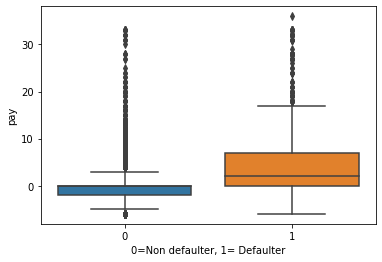

In [ ]:
sns.boxplot(data=data, y="pay",x="def_pay")
plt.xlabel("0=Non defaulter, 1= Defaulter")
plt.show()

* As we can clearly see high cumulative Pay value increases the chance of being a defaulters

# **Outlier Removal**

Since we can see that there are records who become defaulter for next month while making sure they have never made late payments/defaults, so we will remove those since it is imposible to predict them.

In [ ]:
print (data["def_pay"].value_counts())
data = data.drop(data[(data.def_pay == 1) & (data.pay < 0) & (data.PAY_SEPT < 1)].index)
data = data.drop(data[(data.def_pay == 1) & (data.PAY_SEPT < 1) & (data.PAY_AUG < 1) & (data.PAY_JUL < 1) & (data.PAY_JUN < 1)].index)
data["def_pay"].value_counts()


0    23364
1     6636
Name: def_pay, dtype: int64


0    23364
1     4004
Name: def_pay, dtype: int64

# **Correlation Analysis**

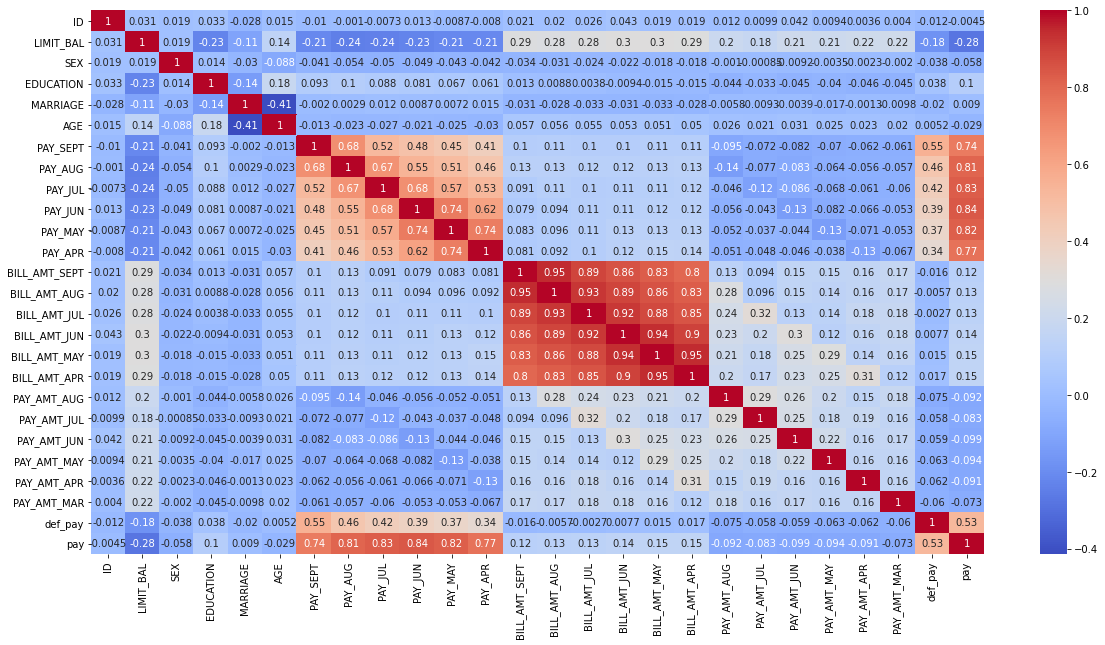

In [ ]:
plt.figure (figsize= (20,10))
corelation= data.corr()
sns.heatmap(corelation, annot=True, cmap='coolwarm')

* It seems from the above graph is there are some negatively correlated feature like age and marriage but we cannot blindly remove this feature because it could be important feature for prediction. 
* ID is unimportant and it has no role in prediction so we will remove it.
* Age and Marriage are also highly uncorrelated so we will drop that as well.
* At the same time older bill data is alo unimportant so we will drop that as well.

In [ ]:
data.drop(['ID'], axis=1, inplace=True)
data.drop(['AGE',"MARRIAGE"], axis=1, inplace=True)
data.drop(["BILL_AMT_MAY","BILL_AMT_APR","BILL_AMT_JUN","PAY_AMT_MAY","PAY_AMT_APR","PAY_AMT_MAR"], axis=1, inplace=True)

In [ ]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,def_pay,pay
0,20000,2,2,2,2,-1,-1,0,0,3913,3102,689,0,689,0,1,2
1,120000,2,2,-1,2,0,0,0,2,2682,1725,2682,0,1000,1000,1,3
2,90000,2,2,0,0,0,0,0,0,29239,14027,13559,1518,1500,1000,0,0
3,50000,2,2,0,0,0,0,0,0,46990,48233,49291,2000,2019,1200,0,0
4,50000,1,2,-1,0,-1,0,0,0,8617,5670,35835,2000,36681,10000,0,-2


# **Feature Engineering**

**ONE HOT ENCODING**

In [ ]:
data = pd.get_dummies(data,columns=['EDUCATION','SEX'])

In [ ]:
data.head()

,LIMIT_BAL,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,def_pay,pay,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,SEX_1,SEX_2
0,20000,2,2,-1,-1,0,0,3913,3102,689,0,689,0,1,2,0,1,0,0,0,1
1,120000,-1,2,0,0,0,2,2682,1725,2682,0,1000,1000,1,3,0,1,0,0,0,1
2,90000,0,0,0,0,0,0,29239,14027,13559,1518,1500,1000,0,0,0,1,0,0,0,1
3,50000,0,0,0,0,0,0,46990,48233,49291,2000,2019,1200,0,0,0,1,0,0,0,1
4,50000,-1,0,-1,0,0,0,8617,5670,35835,2000,36681,10000,0,-2,0,1,0,0,1,0


Let's remove the columns that are unimportant for further analysis.

In [ ]:
data.drop(['EDUCATION_4'],axis = 1, inplace = True)

In [ ]:
data.head()

,LIMIT_BAL,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,def_pay,pay,EDUCATION_1,EDUCATION_2,EDUCATION_3,SEX_1,SEX_2
0,20000,2,2,-1,-1,0,0,3913,3102,689,0,689,0,1,2,0,1,0,0,1
1,120000,-1,2,0,0,0,2,2682,1725,2682,0,1000,1000,1,3,0,1,0,0,1
2,90000,0,0,0,0,0,0,29239,14027,13559,1518,1500,1000,0,0,0,1,0,0,1
3,50000,0,0,0,0,0,0,46990,48233,49291,2000,2019,1200,0,0,0,1,0,0,1
4,50000,-1,0,-1,0,0,0,8617,5670,35835,2000,36681,10000,0,-2,0,1,0,1,0


##**Feature Scaling of Numerical Features**

In [ ]:
X= data.drop(['def_pay'], axis = 1)
y= data.def_pay

X = X.apply(lambda x : (x-np.mean(x))/np.std(x))

In [ ]:
X.head()

,LIMIT_BAL,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,pay,EDUCATION_1,EDUCATION_2,EDUCATION_3,SEX_1,SEX_2
0,-1.140949,1.876661,1.865833,-1.166080,-1.170913,-0.064375,-0.060048,-0.652629,-0.658271,-0.678624,-0.341905,-0.227250,-0.296681,0.285232,-0.741843,1.071381,-0.441712,-0.805588,0.805588
1,-0.372083,-1.272227,1.865833,-0.141675,-0.104754,-0.064375,2.208268,-0.669511,-0.677786,-0.649704,-0.341905,-0.214112,-0.240879,0.506529,-0.741843,1.071381,-0.441712,-0.805588,0.805588
2,-0.602743,-0.222597,-0.154188,-0.141675,-0.104754,-0.064375,-0.060048,-0.305307,-0.503438,-0.491874,-0.252160,-0.192989,-0.240879,-0.157361,-0.741843,1.071381,-0.441712,-0.805588,0.805588
3,-0.910289,-0.222597,-0.154188,-0.141675,-0.104754,-0.064375,-0.060048,-0.061869,-0.018660,0.026612,-0.223664,-0.171063,-0.229718,-0.157361,-0.741843,1.071381,-0.441712,-0.805588,0.805588
4,-0.910289,-1.272227,-0.154188,-1.166080,-0.104754,-0.064375,-0.060048,-0.588118,-0.621876,-0.168640,-0.223664,1.293263,0.261345,-0.599954,-0.741843,1.071381,-0.441712,1.241329,-1.241329


In [ ]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: def_pay, dtype: int64

# **Spiliting Dataset into training and test set.**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(19157, 19)
(8211, 19)


# **Over Sampling**

**As we have imbalance dataset so we have to apply over-sampling to balance it.**

In [ ]:
data['def_pay'].value_counts()

0    23364
1     4004
Name: def_pay, dtype: int64

In [ ]:
from collections import Counter

In [ ]:
from imblearn.over_sampling import RandomOverSampler

os = RandomOverSampler()

# fit predictor and target variable
X_train_os, y_train_os = os.fit_sample(X_train, y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_train_os))

Original dataset shape Counter({0: 16349, 1: 2808})
Resample dataset shape Counter({1: 16349, 0: 16349})


* Now, we have balanced dataset.

# **Applying Machine Learning Algorithm for Classification Problem**

# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {'penalty':['l1','l2'], 'C' : [0.0001,0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 10, 20, 50, 100] }

logistic_model= GridSearchCV(LogisticRegression(), param_grid, scoring = 'recall', n_jobs = -1, verbose = 3, cv = 3)
logistic_model.fit(X_train_os, y_train_os)

Fitting 3 folds for each of 34 candidates, totalling 102 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 102 out of 102 | elapsed:    4.9s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                               0.6, 0.7, 0.8, 0.9, 1, 10, 20, 50, 100],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=3)

In [ ]:
logistic_model.best_estimator_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
logistic_model.score(X_train_os, y_train_os)

0.8502049054988072

In [ ]:
y_pred_logistic_train = logistic_model.predict(X_train_os)

In [ ]:
y_pred_logistic_test = logistic_model.predict(X_test)

## **Model Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

In [ ]:
logistic_train_accuracy= accuracy_score(y_train_os, y_pred_logistic_train)
logistic_test_accuracy= accuracy_score(y_test, y_pred_logistic_test)

print("The accuracy on train data is ", logistic_train_accuracy)
print("The accuracy on test data is ", logistic_test_accuracy)

The accuracy on train data is  0.8630497278120985
The accuracy on test data is  0.8806479113384484


In [ ]:
logistic_test_precision= precision_score(y_test, y_pred_logistic_test)
logistic_test_recall= recall_score(y_test, y_pred_logistic_test)
logistic_test_f1score= f1_score(y_test, y_pred_logistic_test)
logistic_test_roc_auc= roc_auc_score(y_test, y_pred_logistic_test)
logistic_test_confusion_matrix= confusion_matrix(y_test, y_pred_logistic_test)

In [ ]:
model_results = pd.DataFrame([['Logistic Regression', logistic_test_accuracy, logistic_test_precision, logistic_test_recall, 
                         logistic_test_f1score, logistic_test_roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC Score'])
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC Score
0,Logistic Regression,0.880648,0.559933,0.843645,0.673115,0.865301


**Confusion Matrix**

In [ ]:
print(logistic_test_confusion_matrix)

[[6222  793]
 [ 187 1009]]


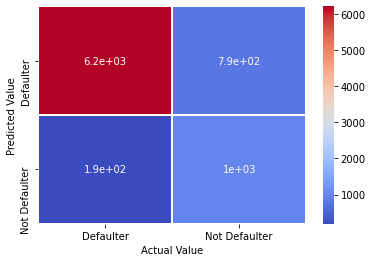

In [ ]:
labels = ['Defaulter', 'Not Defaulter']
ax= plt.subplot()
sns.heatmap(logistic_test_confusion_matrix, annot= True,linewidths=1, cmap='coolwarm', ax= ax)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

# **Stochastic Gradient Descent**

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_params = {'alpha': [0.0001,0.00001, 0.001, 0.01,0.05,0.1,0.2,0.3,0.4,0.5, 1.0, 5.0]}

sgd_model = GridSearchCV(SGDClassifier(class_weight='balanced'), param_grid=sgd_params, scoring='recall', cv=3, n_jobs=-1)
sgd_model.fit(X_train_os, y_train_os)

GridSearchCV(cv=3, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight='balanced',
                                     early_stopping=False, epsilon=0.1,
                                     eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.0001, 1e-05, 0.001, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 1.0, 5.0]},
             pre_dispatch='

In [ ]:
sgd_model.best_estimator_

SGDClassifier(alpha=1e-05, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
sgd_model.best_params_

{'alpha': 1e-05}

In [ ]:
sgd_model.score(X_train_os, y_train_os)

0.8647012049666646

In [ ]:
y_pred_sgd_train = sgd_model.predict(X_train_os)
y_pred_sgd_test = sgd_model.predict(X_test)

## **Model Evaluation**

In [ ]:
sgd_train_accuracy= accuracy_score(y_train_os, y_pred_sgd_train)
sgd_test_accuracy= accuracy_score(y_test, y_pred_sgd_test)

print("The accuracy on train data is ", sgd_train_accuracy)
print("The accuracy on test data is ", sgd_test_accuracy)

The accuracy on train data is  0.8684017371093034
The accuracy on test data is  0.8796736085738643


In [ ]:
sgd_test_precision= precision_score(y_test, y_pred_sgd_test)
sgd_test_recall= recall_score(y_test, y_pred_sgd_test)
sgd_test_f1score= f1_score(y_test, y_pred_sgd_test)
sgd_test_roc_auc= roc_auc_score(y_test, y_pred_sgd_test)
sgd_test_confusion_matrix= confusion_matrix(y_test, y_pred_sgd_test)

In [ ]:
model = pd.DataFrame([['Stochastic Gradient Descent', sgd_test_accuracy, sgd_test_precision, sgd_test_recall, 
                         sgd_test_f1score, sgd_test_roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC Score'])
model_results= model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC Score
0,Logistic Regression,0.880648,0.559933,0.843645,0.673115,0.865301
1,Stochastic Gradient Descent,0.879674,0.556955,0.850334,0.673064,0.867505


**Confusion Matrix**

In [ ]:
print(sgd_test_confusion_matrix)

[[6206  809]
 [ 179 1017]]


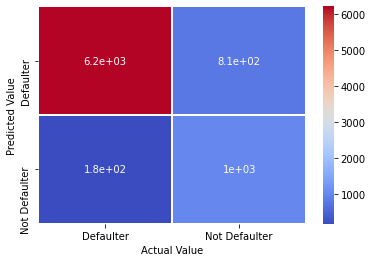

In [ ]:
labels = ['Defaulter', 'Not Defaulter']
ax= plt.subplot()
sns.heatmap(sgd_test_confusion_matrix, annot= True,linewidths=1, cmap='coolwarm', ax= ax)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

# **Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

parameters = {'max_depth':[2,4,6,8,10],
              'min_samples_leaf':[2,4,6,8,10], 
              'min_samples_split':[2,4,6,8,10],
              }

dt_model = GridSearchCV(DecisionTreeClassifier(), param_grid= parameters, scoring = 'recall', cv=3, n_jobs=-1)
dt_model.fit(X_train_os, y_train_os)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                        

In [ ]:
dt_model.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [ ]:
dt_model.score(X_train_os, y_train_os)

0.9857483638143005

In [ ]:
y_pred_dt_train = dt_model.predict(X_train_os)
y_pred_dt_test = dt_model.predict(X_test)

##**Model Evalaution**

In [ ]:
dt_train_accuracy= accuracy_score(y_train_os, y_pred_dt_train)
dt_test_accuracy= accuracy_score(y_test, y_pred_dt_test)

print("The accuracy on train data is ", dt_train_accuracy)
print("The accuracy on test data is ", dt_test_accuracy)

The accuracy on train data is  0.9001467979692948
The accuracy on test data is  0.8491048593350383


In [ ]:
dt_test_precision= precision_score(y_test, y_pred_dt_test)
dt_test_recall= recall_score(y_test, y_pred_dt_test)
dt_test_f1score= f1_score(y_test, y_pred_dt_test)
dt_test_roc_auc= roc_auc_score(y_test, y_pred_dt_test)
dt_test_confusion_matrix= confusion_matrix(y_test, y_pred_dt_test)

In [ ]:
model = pd.DataFrame([['Decision Tree Classifier', dt_test_accuracy, dt_test_precision, dt_test_recall, 
                         dt_test_f1score, dt_test_roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC Score'])
model_results= model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC Score
0,Logistic Regression,0.880648,0.559933,0.843645,0.673115,0.865301
1,Stochastic Gradient Descent,0.879674,0.556955,0.850334,0.673064,0.867505
2,Decision Tree Classifier,0.849105,0.490901,0.969900,0.651869,0.899205


**Confusion Matrix**

In [ ]:
print(dt_test_confusion_matrix)

[[5812 1203]
 [  36 1160]]


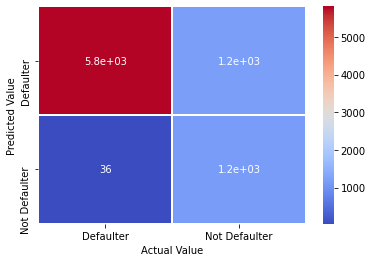

In [ ]:
labels = ['Defaulter', 'Not Defaulter']
ax= plt.subplot()
sns.heatmap(dt_test_confusion_matrix, annot= True, linewidths=1, cmap='coolwarm', ax= ax)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

# **Default XGBoost Classifier**

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(class_weight='balanced')
xgb.fit(X_train_os, y_train_os)

XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
xgb.score(X_train_os, y_train_os)

0.8997798030460579

In [ ]:
y_pred_default_xgb_train = xgb.predict(X_train_os)
y_pred_default_xgb_test = xgb.predict(X_test.values)

##**Model Evaluation**

In [ ]:
default_xgb_train_accuracy= accuracy_score(y_train_os, y_pred_default_xgb_train)
default_xgb_test_accuracy= accuracy_score(y_test, y_pred_default_xgb_test)

print("The accuracy on train data is ", default_xgb_train_accuracy)
print("The accuracy on test data is ", default_xgb_test_accuracy)

The accuracy on train data is  0.8997798030460579
The accuracy on test data is  0.8520277676287906


In [ ]:
default_xgb_test_precision= precision_score(y_test, y_pred_default_xgb_test)
default_xgb_test_recall= recall_score(y_test, y_pred_default_xgb_test)
default_xgb_test_f1score= f1_score(y_test, y_pred_default_xgb_test)
default_xgb_test_roc_auc= roc_auc_score(y_test, y_pred_default_xgb_test)
default_xgb_test_confusion_matrix= confusion_matrix(y_test, y_pred_default_xgb_test)

In [ ]:
model = pd.DataFrame([['Default XGBoost Classifier', default_xgb_test_accuracy, default_xgb_test_precision, default_xgb_test_recall, 
                         default_xgb_test_f1score, default_xgb_test_roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC Score'])
model_results= model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC Score
0,Logistic Regression,0.880648,0.559933,0.843645,0.673115,0.865301
1,Stochastic Gradient Descent,0.879674,0.556955,0.850334,0.673064,0.867505
2,Decision Tree Classifier,0.849105,0.490901,0.969900,0.651869,0.899205
3,Default XGBoost Classifier,0.852028,0.495907,0.962375,0.654535,0.897795


**Confusion Matrix**

In [ ]:
print(default_xgb_test_confusion_matrix)

[[5845 1170]
 [  45 1151]]


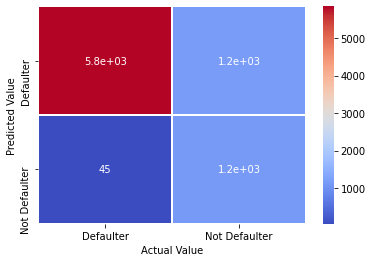

In [ ]:
labels = ['Defaulter', 'Not Defaulter']
ax= plt.subplot()
sns.heatmap(default_xgb_test_confusion_matrix, annot= True, linewidths=1, cmap='coolwarm', ax= ax)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

# **GridSearch on XGBoost Classifier**

In [ ]:
from xgboost import  XGBClassifier

param_xgb ={'n_estimators': [50,80,100],
            'max_depth': [3,5,7],
            'learning_rate': [0.1,0.2], 
            'min_child_weight': [2,3]
            }

xgb_model = GridSearchCV(XGBClassifier(class_weight='balanced'), param_grid=param_xgb, scoring='recall', cv=3, n_jobs=-1)
xgb_model.fit(X_train_os, y_train_os)

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     class_weight='balanced',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2], 'max_depth': [3, 5, 7],
                         'min_child_wei

In [ ]:
xgb_model.best_params_

{'learning_rate': 0.2,
 'max_depth': 7,
 'min_child_weight': 2,
 'n_estimators': 100}

In [ ]:
xgb_model.score(X_train_os, y_train_os)

0.9998165025383815

In [ ]:
y_pred_xgb_train = xgb_model.predict(X_train_os)
y_pred_xgb_test = xgb_model.predict(X_test.values)

## **Model Evaluation**

In [ ]:
xgb_train_accuracy= accuracy_score(y_train_os, y_pred_xgb_train)
xgb_test_accuracy= accuracy_score(y_test, y_pred_xgb_test)

print("The accuracy on train data is ", xgb_train_accuracy)
print("The accuracy on test data is ", xgb_test_accuracy)

The accuracy on train data is  0.9532693131078354
The accuracy on test data is  0.8726099135306297


In [ ]:
xgb_test_precision= precision_score(y_test, y_pred_xgb_test)
xgb_test_recall= recall_score(y_test, y_pred_xgb_test)
xgb_test_f1score= f1_score(y_test, y_pred_xgb_test)
xgb_test_roc_auc= roc_auc_score(y_test, y_pred_xgb_test)
xgb_test_confusion_matrix= confusion_matrix(y_test, y_pred_xgb_test)

In [ ]:
model = pd.DataFrame([['GridSearch XGBoost Classifier', xgb_test_accuracy, xgb_test_precision, xgb_test_recall, xgb_test_f1score, xgb_test_roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC Score'])
model_results= model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC Score
0,Logistic Regression,0.880648,0.559933,0.843645,0.673115,0.865301
1,Stochastic Gradient Descent,0.879674,0.556955,0.850334,0.673064,0.867505
2,Decision Tree Classifier,0.849105,0.490901,0.969900,0.651869,0.899205
3,Default XGBoost Classifier,0.852028,0.495907,0.962375,0.654535,0.897795
4,GridSearch XGBoost Classifier,0.872610,0.540409,0.838629,0.657274,0.858516


* We can see from above results that **Default XGBoost Classifier** giving us the higher **recall** value than the **GridSearch XGBoost Classifier**.
* Here we are more curious about **Recall.**

**Confusion Matrix**

In [ ]:
print(confusion_matrix(y_test, y_pred_xgb_test))

[[6162  853]
 [ 193 1003]]


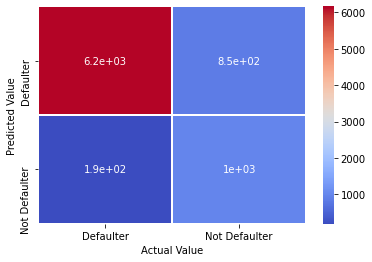

In [ ]:
labels = ['Defaulter', 'Not Defaulter']
ax= plt.subplot()
sns.heatmap(xgb_test_confusion_matrix, annot= True, linewidths=1, cmap='coolwarm', ax= ax)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

# **Support Vector Machine**

In [ ]:
from sklearn import svm
 
#Create a svm Classifier
svm_model = svm.SVC(kernel='poly',gamma='scale',probability=True) 
 
#Train the model using the training sets
svm_model.fit(X_train_os, y_train_os)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
svm_model.score(X_train_os, y_train_os, sample_weight=None)

0.8998103859563276

In [ ]:
y_pred_svm_train = svm_model.predict(X_train_os)
y_pred_svm_test = svm_model.predict(X_test)

## **Model Evalution**

In [ ]:
svm_train_accuracy= accuracy_score(y_train_os, y_pred_svm_train)
svm_test_accuracy= accuracy_score(y_test, y_pred_svm_test)

print("The accuracy on train data is ", svm_train_accuracy)
print("The accuracy on test data is ", svm_test_accuracy)

The accuracy on train data is  0.8998103859563276
The accuracy on test data is  0.8616490074290586


In [ ]:
svm_test_precision= precision_score(y_test, y_pred_svm_test)
svm_test_recall= recall_score(y_test, y_pred_svm_test)
svm_test_f1score= f1_score(y_test, y_pred_svm_test)
svm_test_roc_auc= roc_auc_score(y_test, y_pred_svm_test)
svm_test_confusion_matrix= confusion_matrix(y_test, y_pred_svm_test)

**Confusion Matrix**

In [ ]:
print(svm_test_confusion_matrix)


[[5977 1038]
 [  98 1098]]


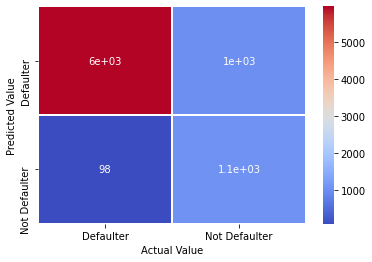

In [ ]:
labels = ['Defaulter', 'Not Defaulter']
ax= plt.subplot()
sns.heatmap(svm_test_confusion_matrix, annot= True, linewidths=1, cmap='coolwarm', ax= ax)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

In [ ]:
model = pd.DataFrame([['Support Vector Machine', svm_test_accuracy, svm_test_precision, svm_test_recall, 
                         svm_test_f1score, svm_test_roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC Score'])
model_results= model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC Score
0,Logistic Regression,0.880648,0.559933,0.843645,0.673115,0.865301
1,Stochastic Gradient Descent,0.879674,0.556955,0.850334,0.673064,0.867505
2,Decision Tree Classifier,0.849105,0.490901,0.969900,0.651869,0.899205
3,Default XGBoost Classifier,0.852028,0.495907,0.962375,0.654535,0.897795
4,GridSearch XGBoost Classifier,0.872610,0.540409,0.838629,0.657274,0.858516
5,Support Vector Machine,0.861649,0.514045,0.918060,0.659064,0.885046


# **ROC Curve**
 
* Receiver Operating Characteristic(ROC) summarizes the model’s performance by evaluating the trade offs between true positive rate (sensitivity) and false positive rate(1- specificity). For plotting ROC, it is advisable to assume p > 0.5 since we are more concerned about success rate.
 
* ROC summarizes the predictive power for all possible values of p > 0.5. The area under curve (AUC), referred to as index of accuracy(A) or concordance index, is a perfect performance metric for ROC curve. Higher the area under curve, better the prediction power of the model.

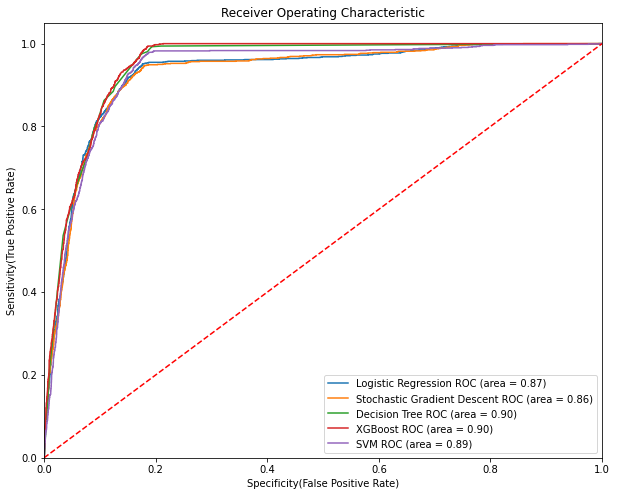

In [ ]:
from sklearn.calibration import CalibratedClassifierCV
import sklearn.metrics as metrics

# false positive rate,fpr= FP/(TN+FP) OR fpr=1-specificty, tpr=sensitivity 
y_pred_logistic_p =logistic_model.predict_proba(X_test)[:, 1]
calibrator = CalibratedClassifierCV(sgd_model, cv='prefit')
sgd_model=calibrator.fit(X_train_os, y_train_os)
y_pred_sgd_p = sgd_model.predict_proba(X_test)[:,1]
y_pred_dt_p =dt_model.predict_proba(X_test)[:,1]
y_pred_svm_p =svm_model.predict_proba(X_test)[:,1]
y_pred_xgb_p =xgb.predict_proba(X_test.values)[:,1]

model = [logistic_model, sgd_model, dt_model, xgb, svm_model]

models=[y_pred_logistic_p, y_pred_sgd_p , y_pred_dt_p, y_pred_xgb_p, y_pred_svm_p]
label=['Logistic Regression', 'Stochastic Gradient Descent', 'Decision Tree', 'XGBoost', 'SVM']

# plotting ROC curves
plt.figure(figsize=(10, 8))
m=np.arange(5)
for m in m:
    fpr, tpr, thresholds= metrics.roc_curve(y_test, models[m])
    auc = metrics.roc_auc_score(y_test,model[m].predict(X_test.values))
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (label[m], auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# **Conclusion**

* The best **accuracy** is obtained for the **Logistic Regression** and **Stochastic Gradient Descent.**
 
* In general, all models have comparable accuracy. Nevertheless, because the classes are imbalanced (the proportion of non-default credit cards is higher than default) this metric is misleading. 
 
* Furthermore, **accuracy** does not consider the rate of **false positives** (non-default credits cards that were predicted as default) and **false negatives** (default credit cards that were incorrectly predicted as non-default). 
 
* Both cases have negative impact on the bank, since **false positives** leads to unsatisfied customers and **false negatives** leads to financial loss.
 
* From above table we can see that **Default XGBoost Classifier** having **Recall**, **F1-score**, and **ROC Score** values equals 96%, 65%, and 89% and **Decision Tree Classifier** having **Recall**, **F1-score**, and **ROC Score** values equals 97%, 65%, and 90%.
 
* **Default XGBoost Classifier** and **Decision Tree Classifier** are giving us the best **Recall, F1-score**, and **ROC Score** among other algorithms. We can conclude that these two algorithms are the best to predict whether the credit card is default or not default according to our analysis.